# Feature importance
The importance of each feature of a dataset can be established by using this method.

Feature importance provides a score for each feature in a dataset. A higher score means the feature has more importance or relevancy in relation to the output feature.

Feature importance is normally an inbuilt class that comes with Tree-Based Classifiers. In the following example, we use the Extra Tree Classifier to determine the top five features in a dataset:

             Feature  Importance
2  petal length (cm)    0.428177
3   petal width (cm)    0.425765
0  sepal length (cm)    0.091767
1   sepal width (cm)    0.054292


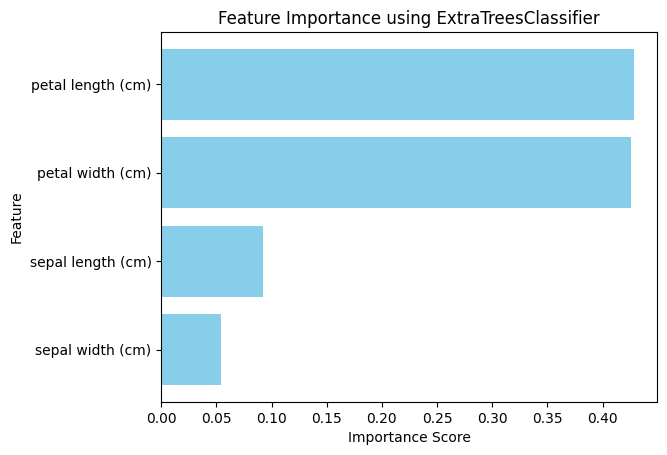

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (species)
feature_names = iris.feature_names

# Train ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display the feature importance
print(importance_df)

# Plot feature importance
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance using ExtraTreesClassifier")
plt.gca().invert_yaxis()
plt.show()


## Visual Representation of the Tree
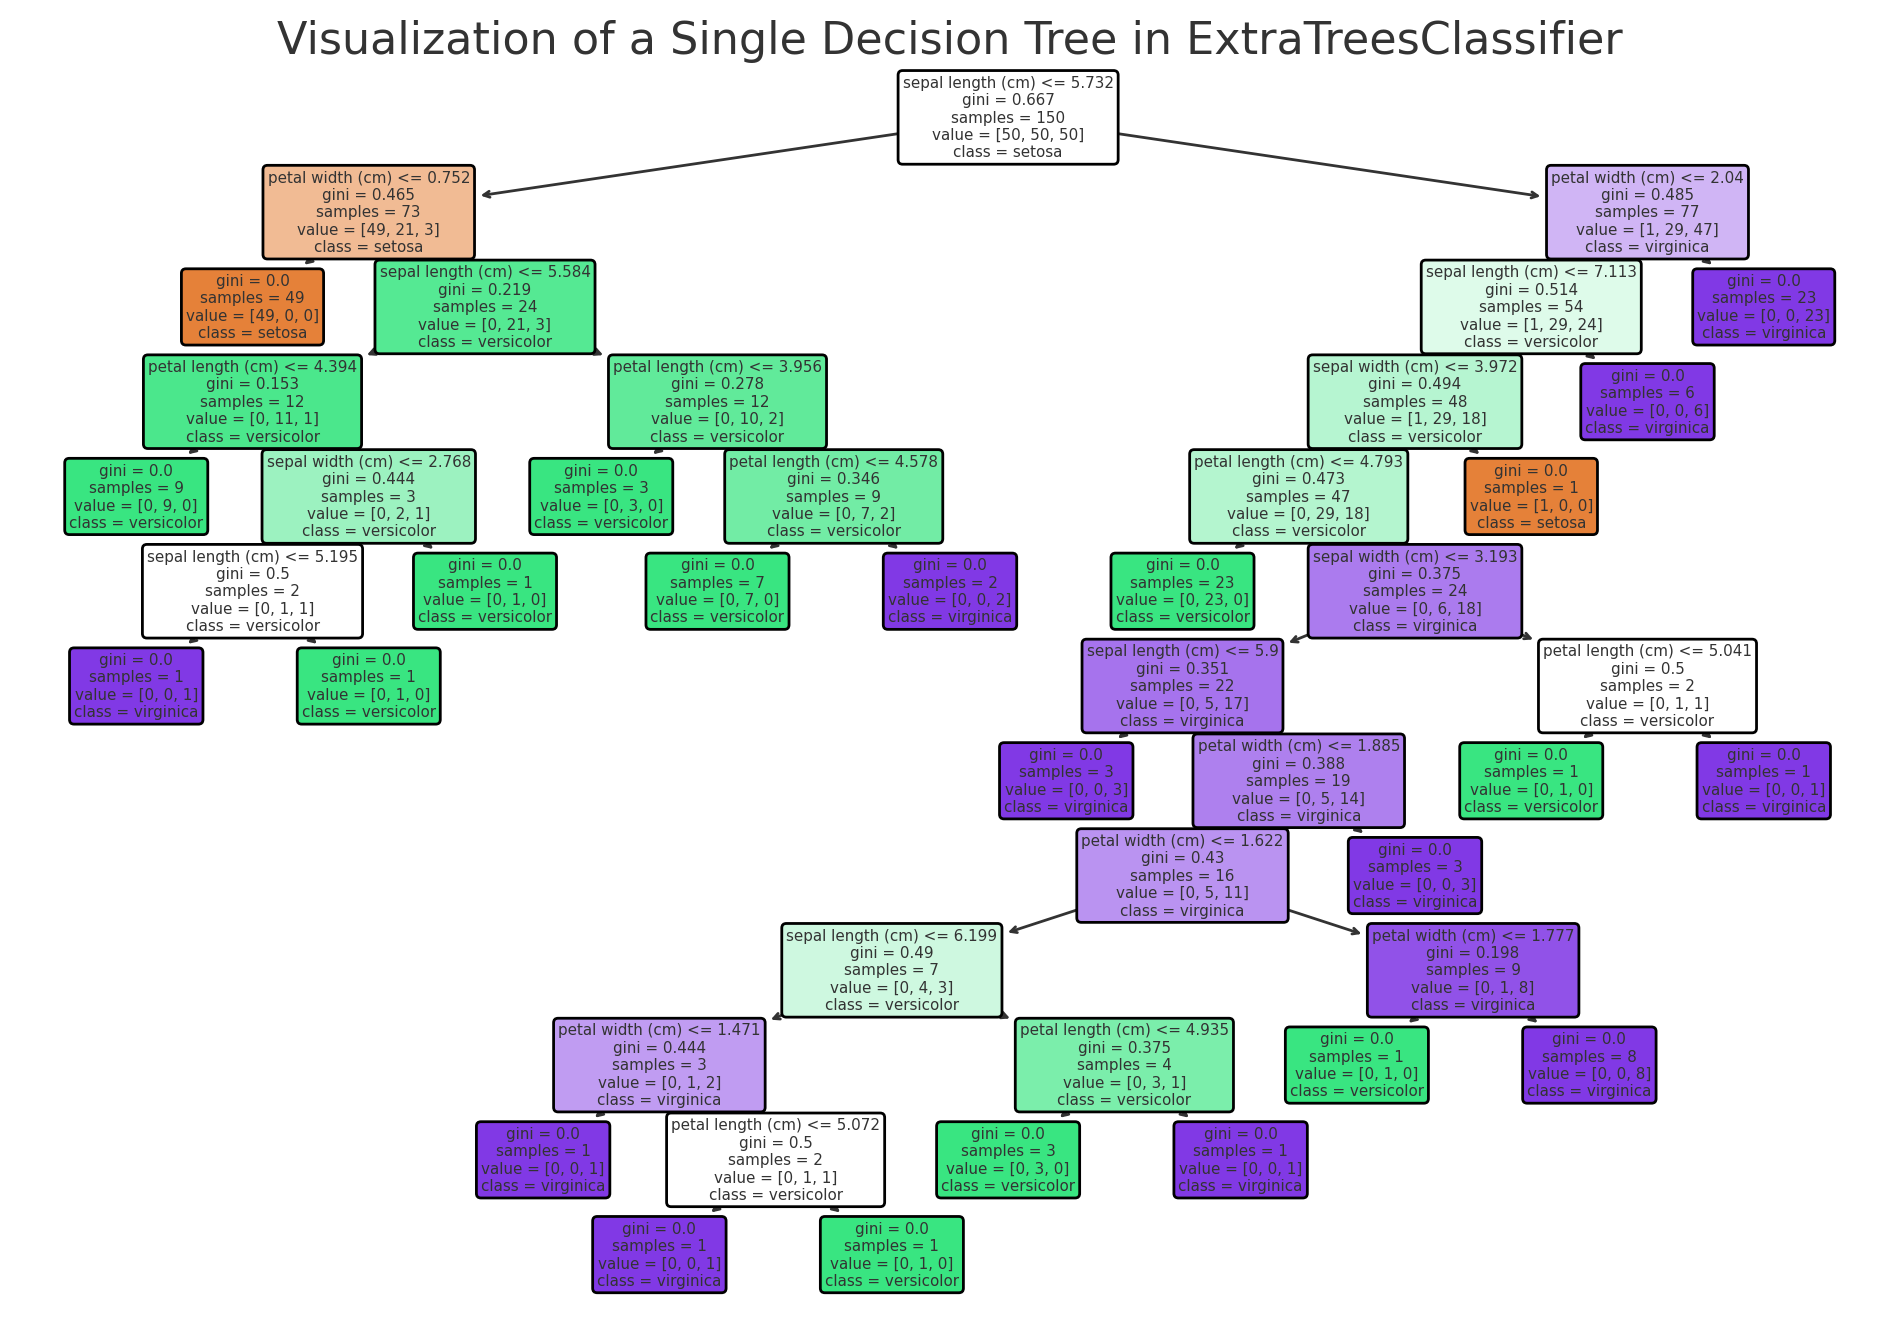

# Univariate selection (Statistical)
Statistical tests can be used to determine which features have the strongest correlation to the output variable. The scikit-learn library has a class called SelectKBest that provides a set of statistical tests to select the K "best" features in a dataset.

The following is an example that uses the chi-squared (chi²) statistical test for non-negative features to select the five best features in an input dataset:

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
feature_names = iris.feature_names

# Apply SelectKBest with chi2 to select top 2 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X, y)

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame({"Feature": feature_names, "Score": fit.scores_})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)

# Display feature importance
print("Top Features in the Iris Dataset:\n", feature_scores)

# Select the best two features and transform the dataset
X_new = bestfeatures.transform(X)
print("\nTransformed Dataset with Selected Features:\n", X_new[:5])  # Display first 5 rows


Top Features in the Iris Dataset:
              Feature       Score
2  petal length (cm)  116.312613
3   petal width (cm)   67.048360
0  sepal length (cm)   10.817821
1   sepal width (cm)    3.710728

Transformed Dataset with Selected Features:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


## Understanding the Chi-Square Test

The Chi-Square statistic measures the difference between observed and expected frequencies in a contingency table.
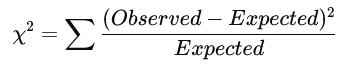

Where:
*    Observed → The actual frequency of samples in each class.
*    Expected → The expected frequency assuming no relationship between the feature and the target.
*    If χ² is high, the feature is highly dependent on the target → Good feature
*    If χ² is low, the feature is independent of the target → Not useful for prediction

## Example Calculation
Consider a dataset predicting whether a student passes an exam based on study hours.
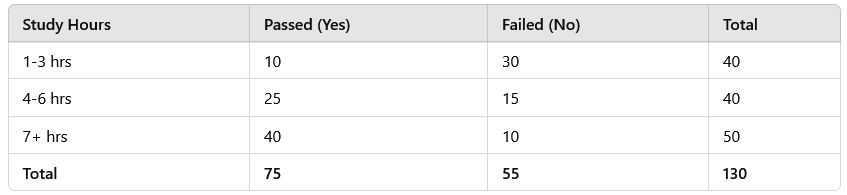

Using the expected frequency formula:

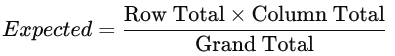

For (1-3 hrs, Passed Yes):

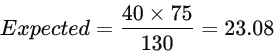

Applying the Chi-Square formula:

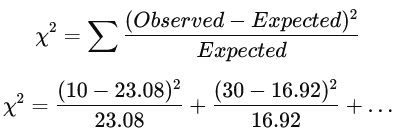

If χ² is large, it means study hours are strongly related to passing.

If χ² is small, it means study hours do not significantly affect passing.

# Correlation heatmaps
A correlation exists between two features when there is a relationship between the different values of the features. For example, if home prices go up as the square footage goes up, these two features are said to be positively correlated. There can be different degrees of correlation. If a feature changes consistently in relation to
another feature, these features are said to be highly correlated.

Correlation can be positive (an increase in one value of a feature increases the value of the target variable) or negative (an increase in one value of a feature decreases the value of the target variable).

Correlation is a continuous value between -1 and 1:


*   If the correlation between two variables is 1, there is a perfect direct correlation.
*   If the correlation between two features is -1, a perfect inverse correlation exists.
* If the correlation is 0 between two features, there is no correlation between the two features.

A heatmap makes it easy to identify which features are most correlated to the target variable. We will plot a heatmap of correlated features using the seaborn library, using the following code:

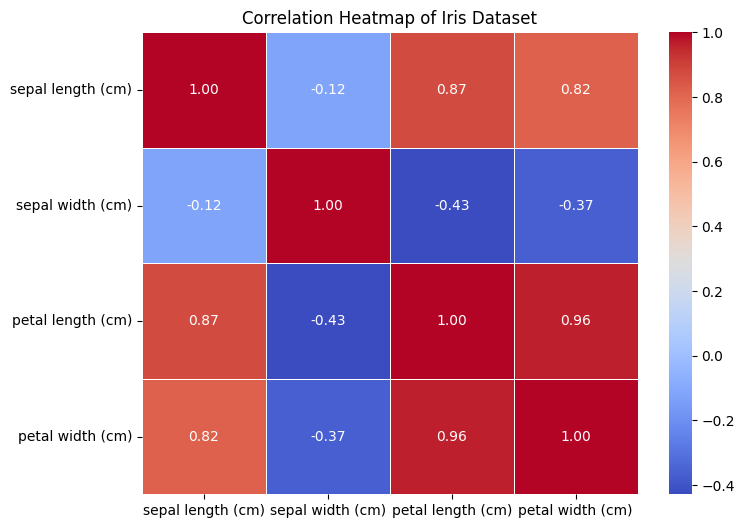

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()


Example Insights:
*    Petal length & petal width have a strong positive correlation (~0.96), meaning they provide similar information.
*    Sepal width & petal length have a slight negative correlation (~-0.36), indicating some inverse relationship.

## Pearson Correlation
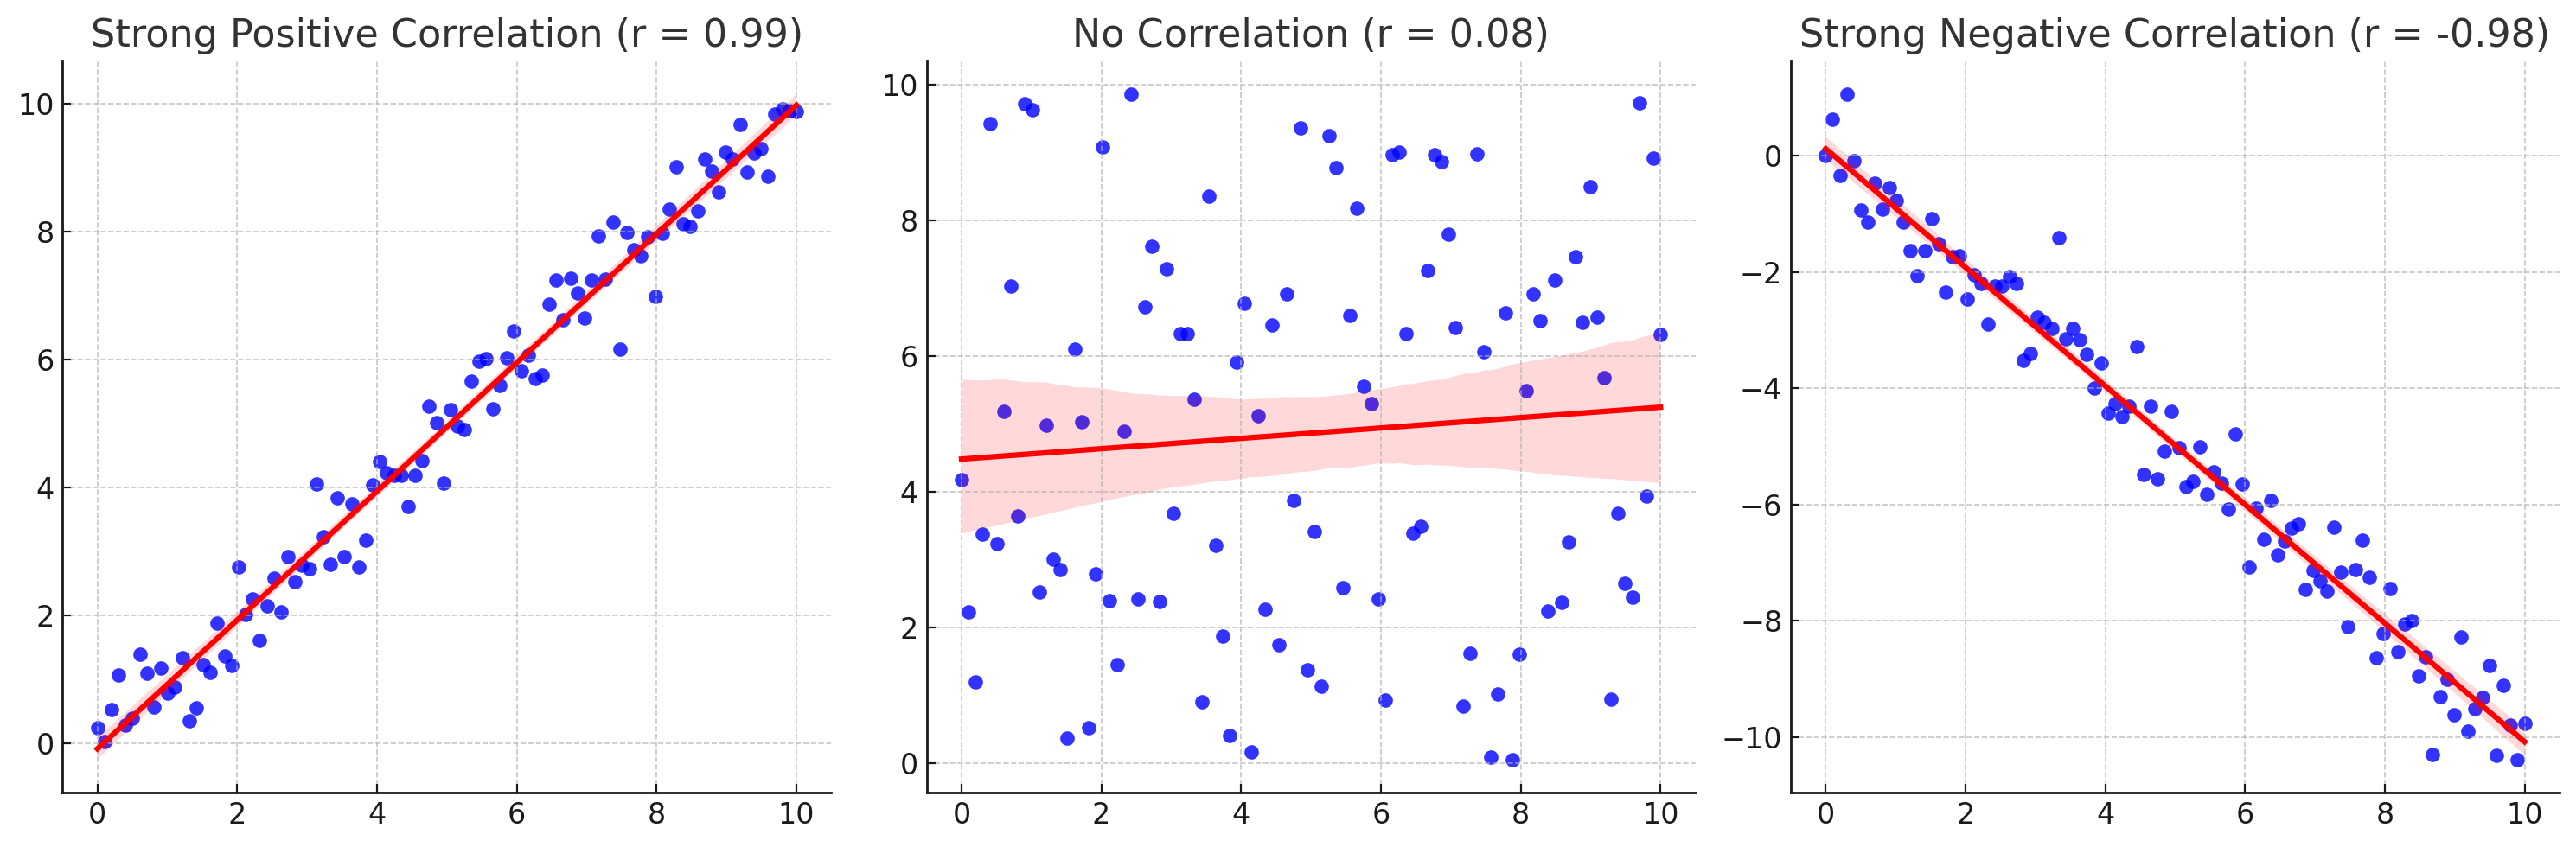

# Wrapper-Based Feature Selection Using RFE

This example selects the top 2 features from the Iris dataset using RecursiveFeatureElimination (RFE).

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
feature_names = iris.feature_names

# Train a model using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply Recursive Feature Elimination (RFE) to select top 2 features
rfe = RFE(estimator=model, n_features_to_select=2)
fit = rfe.fit(X, y)

# Create a DataFrame for feature ranking
feature_ranking = pd.DataFrame({"Feature": feature_names, "Ranking": fit.ranking_})
feature_ranking = feature_ranking.sort_values(by="Ranking")

# Display feature ranking
print("Feature Selection using RFE:\n", feature_ranking)


Feature Selection using RFE:
              Feature  Ranking
3   petal width (cm)        1
2  petal length (cm)        1
0  sepal length (cm)        2
1   sepal width (cm)        3


# Embedded Methods using Lasso Regression (L1 Regularization)

* Uses L1 regularization, which forces some feature coefficients to become exactly 0, effectively removing them.

* Works well when many features are irrelevant or redundant.

In [16]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Train Lasso model
lasso = Lasso(alpha=0.1)  # L1 Regularization
lasso.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({"Feature": feature_names, "Coefficient": lasso.coef_})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

# Display results
print("Lasso Regression Feature Selection:\n", feature_importance)


Lasso Regression Feature Selection:
   Feature  Coefficient
2     bmi   517.186795
8      s5   483.912648
3      bp   275.077235
9      s6    33.673965
7      s4     0.000000
0     age    -0.000000
5      s2    -0.000000
4      s1   -52.539365
1     sex  -155.359976
6      s3  -210.157991


Lasso (L1) Selected Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

Random Forest Feature Importance:
             Feature  Importance
2  petal length (cm)    0.436130
3   petal width (cm)    0.436065
0  sepal length (cm)    0.106128
1   sepal width (cm)    0.021678


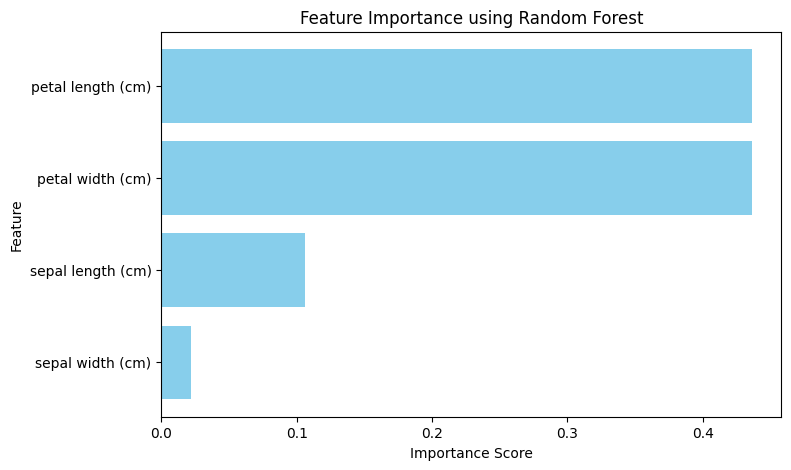

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# 1️⃣ Lasso (L1 Regularization) for Feature Selection
log_reg = LogisticRegression(penalty="l1", solver="liblinear", C=0.1)  # L1 regularization (Lasso)
log_reg.fit(X, y)
lasso_selection = SelectFromModel(log_reg, prefit=True)

# Get selected features
lasso_selected_features = [feature_names[i] for i in range(len(feature_names)) if lasso_selection.get_support()[i]]
print("Lasso (L1) Selected Features:", lasso_selected_features)

# 2️⃣ Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create DataFrame for feature importance
rf_feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": rf.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by="Importance", ascending=False)

# Display feature importance
print("\nRandom Forest Feature Importance:")
print(rf_feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(rf_feature_importance["Feature"], rf_feature_importance["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()
plt.show()
